# Molecular Fingerprints, Properties and analysis of 8-aminoquinoline fluorescent probes

Molecular fingerprints are moelcular descriptors that encode molecular features/fragments of a molecule in the form of a binary digit (0 or 1). For drug discovery, these features can include (but are not limited to) specific functional groups (aldehydes, ketones, amides, etc) or ring structures (benzene, pyridine, etc) present within the molecule. These fingerprints allow for the creation of a mathematical matrix that can be used to perform computations.

There are molecular fingerprints that can be generated based upon compound structure that are useful for machine learning applications in drug discovery. Fingerprints are divided into 'bits' that indicate whether or not a specific descriptor is present within a molecule. A bit is defined to be "ON" or 1 if a certain fragment is found in a molecular structure. These include:

1) Extended Connectivity Fingerprinting (ECFP). These are circular, topological fingerprints designed for moelcular characterization, similarity searching, and structure-activity modeling.

2) MACCS Keys (Molecular ACCess System). These are 2D structure fingerprints that are used for the measure of molecular similarity. They encode the presence of 166 predefined structural features.

3) Morgan Fingerprint (Circular Fingerprint). Sometimes described as a reimplementation of the ECFP, these fingerprints utilize circular fingerprints to capture atom environments within a specified radius.

4) Pharmacophore Fingerprints. Creates fingerprints based on the presence or absence of pharmacophore features and distances in a single molecule or compound collection. 

5) Topological Torsion Fingerprint. These fingerprints seek to compliment the long range relationships captured in atom pair fingerprints by representing short-range information contained in the torsion angles of a molecule.

6) Atom Pairs Fingerprints. Atom pairs are "defined in terms of the atomic environments of, and shorest path separations between, all pairs of atoms in the topological representation of a chemical structure." ( Carhart et al. JCICS 25:64-73 (1985)). Distinct atom types are defined by tuples of atomic number, number of heavy atom neighbors, aromaticity and chirality. All unique triplets in a molecule are enumerated and stored in sparse count or bit vector format.

7) Avalon Fingerprints. These are substructure or similarity fingerprints that allow for faster substructure queries.

This project will focus on generating these various fingerprints for 8-AQ fluorescent probes using the RDKit package. This notebook will generate Morgan, MACCS keys, and ECFPs to start.

In [1]:
#import standard python packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from rdkit import Chem
# RDKit drawing
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
# RDKit fingerprint generator
from rdkit.Chem import rdFingerprintGenerator
# RDKit functionality for basic data structures
from rdkit.Chem import DataStructs
# Settings to improve quality of structures
from rdkit.Chem import rdDepictor
# SVG = scalable vector graphics, set to false if wanting PNGs instead
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
# Add ability to add a molecule to a dataframe
from rdkit.Chem import PandasTools
#For molecular descriptors
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import SimilarityMaps
import io
from PIL import Image
# mols2grid library provides convenient way to display molecules in a grid
import mols2grid
from rdkit import RDLogger
from rdkit.Chem import AllChem

In [2]:
#construct dataframe with 8-aminoquinoline (8-AQ) and 8-AQ fluorescent probe SMILES and IC50s in P. falciparum

cmpd_dict = {'Compound':['Primaquine', 'PQCP', 'Tafenoquine', 'TQCP'], 'SMILES': ['COc2cc(NC(C)CCCN)c1ncccc1c2', 
                            'COc4cc(NC(C)CCCNC(=O)CCCc1cc(=O)oc2cc(O)ccc12)c3ncccc3c4', 
                            "COc3cc(C)c2c(Oc1cccc(C(F)(F)F)c1)c(OC)cc(NC(C)CCCN)c2n3", 
                            "COc5cc(C)c4c(Oc1cccc(C(F)(F)F)c1)c(OC)cc(NC(C)CCCNC(=O)CCCc2cc(=O)oc3cc(O)ccc23)c4n5"] 
                                                           , "3D7_IC50 (uM)":[5.77, 10.5, 3.59, 2.19]}

df = pd.DataFrame(cmpd_dict)

df

,Compound,SMILES,3D7_IC50 (uM)
0,Primaquine,COc2cc(NC(C)CCCN)c1ncccc1c2,5.77
1,PQCP,COc4cc(NC(C)CCCNC(=O)CCCc1cc(=O)oc2cc(O)ccc12)...,10.50
2,Tafenoquine,COc3cc(C)c2c(Oc1cccc(C(F)(F)F)c1)c(OC)cc(NC(C)...,3.59
3,TQCP,COc5cc(C)c4c(Oc1cccc(C(F)(F)F)c1)c(OC)cc(NC(C)...,2.19


In [3]:
#define cmpds variable to create object for molecules
cmpds = df['SMILES'].apply(Chem.MolFromSmiles).tolist()
cmpds

In [4]:
#display molecules in grid format
mols2grid.display(cmpds)

MolGridWidget()

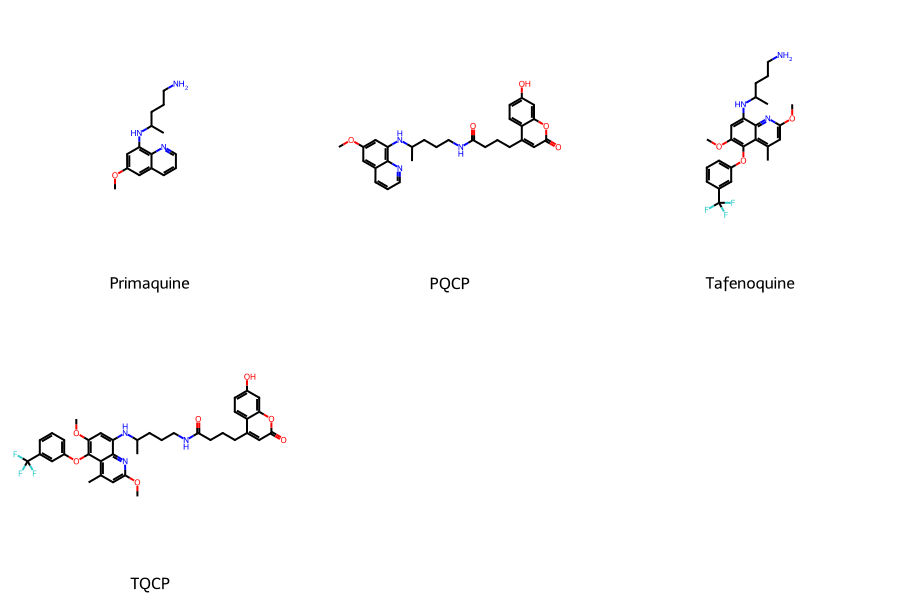

In [5]:
#Drawing molecules in a grid and labeling them

Draw.MolsToGridImage(cmpds, molsPerRow = 3, 
                     legends = ("Primaquine", "PQCP", "Tafenoquine", "TQCP"), 
                     subImgSize=(300, 300), 
                     useSVG = True
                    )

### Assigning each molecule to a variable

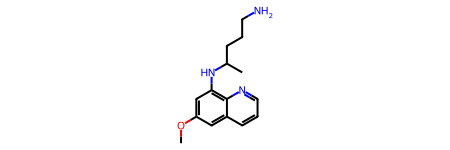

In [6]:
#Primaquine
PQ = Chem.MolFromSmiles("COc2cc(NC(C)CCCN)c1ncccc1c2")
PQ

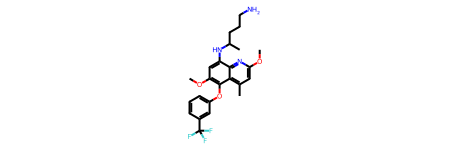

In [7]:
#Tafenoquine
TQ = Chem.MolFromSmiles("COc3cc(C)c2c(Oc1cccc(C(F)(F)F)c1)c(OC)cc(NC(C)CCCN)c2n3")
TQ

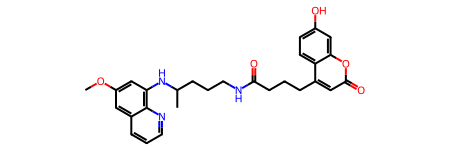

In [8]:
#Primaquine-Coumarin Probe
PQCP = Chem.MolFromSmiles('COc4cc(NC(C)CCCNC(=O)CCCc1cc(=O)oc2cc(O)ccc12)c3ncccc3c4')
PQCP

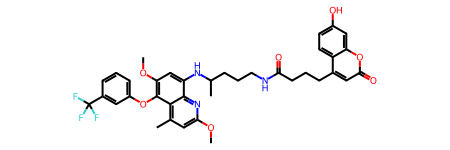

In [9]:
#Tafenoquine-Coumarin Probe
TQCP = Chem.MolFromSmiles("COc5cc(C)c4c(Oc1cccc(C(F)(F)F)c1)c(OC)cc(NC(C)CCCNC(=O)CCCc2cc(=O)oc3cc(O)ccc23)c4n5")
TQCP

,Compound,SMILES,3D7_IC50 (uM),Molecular_structure
0,Primaquine,COc2cc(NC(C)CCCN)c1ncccc1c2,5.77,
1,PQCP,COc4cc(NC(C)CCCNC(=O)CCCc1cc(=O)oc2cc(O)ccc12)...,10.50,
2,Tafenoquine,COc3cc(C)c2c(Oc1cccc(C(F)(F)F)c1)c(OC)cc(NC(C)...,3.59,
3,TQCP,COc5cc(C)c4c(Oc1cccc(C(F)(F)F)c1)c(OC)cc(NC(C)...,2.19,

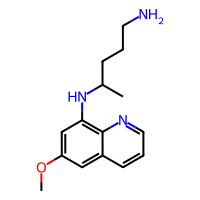
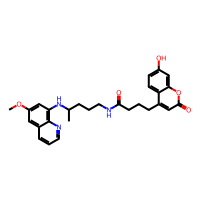
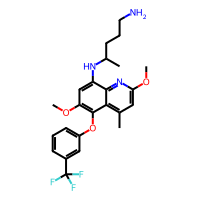
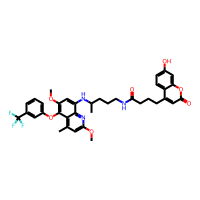

In [10]:
#generating molecular images from smiles and integrating into df

#adding molecular structure column to df
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='SMILES', molCol='Molecular_structure', includeFingerprints=False)

#display molecular structure instead of HTML code
PandasTools.RenderImagesInAllDataFrames(images=True)

df.head()

## Generating Morgan-Circular Fingerprints

In [11]:
#generate Morgan fingerprints and onbits for PQ
Morganbits ={}
mf_PQ = AllChem.GetMorganFingerprintAsBitVect(PQ, 2, nBits=512, bitInfo=Morganbits)
print(np.array(mf_PQ))

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 

In [12]:
#Index and number of onbits
#index of on bits
print("Index of On bits:", tuple(mf_PQ.GetOnBits()))

#number of on bits
print("Number of On bits:", len(mf_PQ.GetOnBits()))

Index of On bits: (0, 1, 19, 33, 63, 64, 80, 103, 128, 130, 147, 175, 178, 183, 188, 194, 200, 214, 227, 269, 283, 304, 319, 322, 323, 329, 330, 337, 340, 356, 363, 375, 378, 380, 403, 422, 428, 441, 448, 469, 475, 482, 493)
Number of On bits: 43


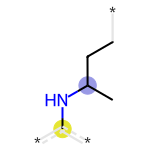

In [13]:
#How can i see what feature turns a bit 'on' in the notebook?

Draw.DrawMorganBit(PQ, 175, Morganbits) #seeing what feature 175 describes in PQ

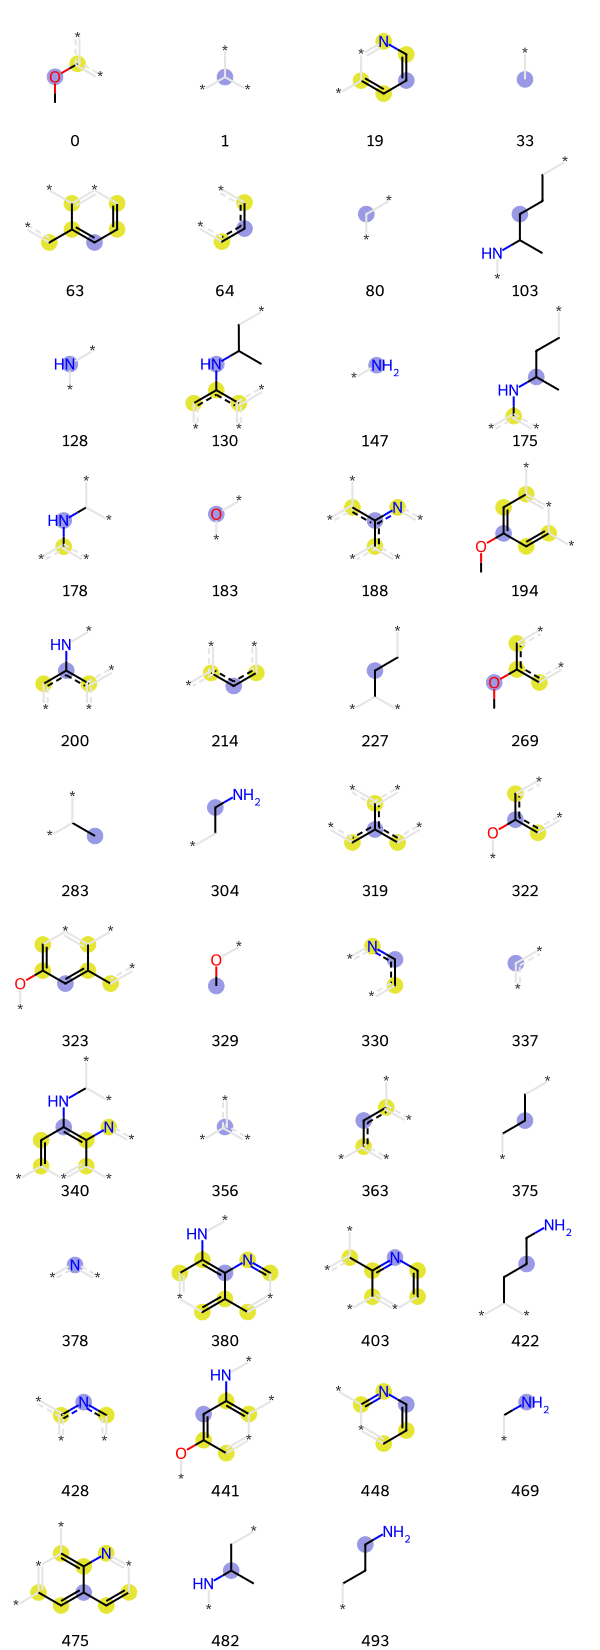

In [14]:
#What if I wanted to render all the features responsible for making ON bits?

all_frag = [(PQ, x, Morganbits) for x in mf_PQ.GetOnBits()]
Draw.DrawMorganBits(all_frag[:], molsPerRow=4, legends=[str(x) for x in mf_PQ.GetOnBits()][:])

#### Note: 
The numbers above represent the INDEX value of the bit, and not the actual value within the package itself. The value within the package can be found by subtracting 1 from the index value listed.

## Similarity Maps for Primaquine and PQCP from Morgan Fingerprints

References to understand Similarity maps via fingerprinting:

> Riniker, S.; Landrum, G. A. “Similarity Maps - A Visualization Strategy for Molecular Fingerprints and Machine-Learning Methods” J. Cheminf. 5:43 (2013)

Here we'll use a function to create a similarity map and calculate weights based on morgan fingerprints. We'll compare the reference and probe compounds to one another to see how the maxweight value changes.

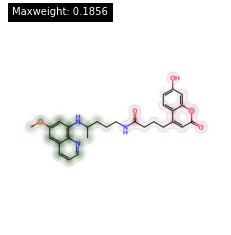

In [15]:
#create a function to draw similarity maps between reference and test molecules and display the maxweight value

#function for similarity map and maxweight value calculation
def similarity_map(refmol, expmol):
    RDLogger.DisableLog('rdApp.*')  # Disable RDKit logs for this specific task
    
    # Define variable to draw map
    x = Draw.MolDraw2DCairo(500, 500)
    
    # Create figure and maxweight variables to display molecule and calculate maxweight
    # create a lambda function for SimilarityMaps, then select fingerprint type; in this case, we use the Morgan 
    # fingerprint
    #types of Morgan fingerprint: bit vector (bv, default) & count vector (count)
    figure, maxw = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, expmol, 
                                                                 lambda d, e: SimilarityMaps.GetMorganFingerprint(d, e, radius=2, 
                                                                                                                  fpType='bv'), 
                                                                 draw2d=x)
    
    # Draw 'x'
    x.FinishDrawing()
    
    # Assign variable to display new similarity map
    image_data = x.GetDrawingText()
    img = Image.open(io.BytesIO(image_data))
    
    # Display image using matplotlib and add maxweight value as text
    plt.imshow(img)
    plt.text(10, 10, f"Maxweight: {maxw:.4f}", color='white', backgroundcolor='black')
    plt.axis('off')
    plt.show()

# Example usage

similarity_map(PQ, PQCP)


### Note
Maxweight is a structure comparison metric that determines maximum difference between the reference (PQ) and probe (PQCP) molecules.

The similarity map and the lower value of maxweight is consistent with the differences between PQ and PQCP, since PQCP has a linker and coumarin moiety attached. The presence of an entire additional molecule would ensure that they're not as similiar. We should see a similar trend for TQ and TQCP

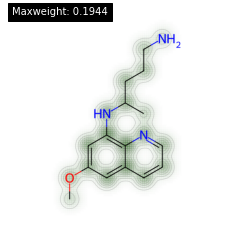

In [16]:
similarity_map(PQ, PQ)

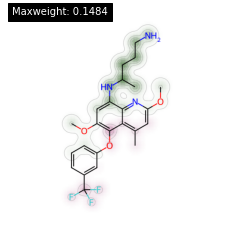

In [17]:
similarity_map(PQ, TQ)

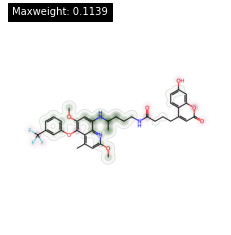

In [18]:
similarity_map(PQ, TQCP)

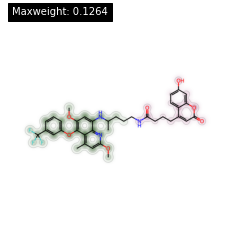

In [19]:
similarity_map(TQ, TQCP)

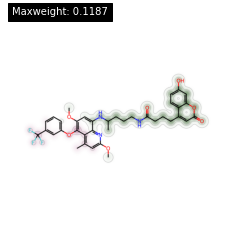

In [20]:
similarity_map(PQCP, TQCP)

In [21]:
#visualization for maxweight differences 

Answer these questions in the explanation:

-How are similarity maps generated? What are the calculations used?
-Why is this value lower than PQ/PQCP comparisons?

In [22]:
#what are some of the molecular properties of the antimalarials and their probes?

def mol_properties(smiles):
    MW = []
    logp = []
    tpsa = []
    H_acceptors = []
    H_donors = []
    
    mols = [Chem.MolFromSmiles(x) for x in smiles]
    for mol in mols:
        #calculate molecular weight
        mwt = Descriptors.MolWt(mol)
        MW.append(mwt)
        
        #calculate logp
        log_p = Descriptors.MolLogP(mol)
        logp.append(log_p)
        
        #calculate polar surface area value
        psav = Descriptors.TPSA(mol)
        tpsa.append(psav)
        
        #calculate H-bond acceptors
        hacc = Descriptors.NumHAcceptors(mol)
        H_acceptors.append(hacc)
        
        #calc H-bond donors
        hdon = Descriptors.NumHDonors(mol)
        H_donors.append(hdon)
        
    return MW, logp, tpsa, H_acceptors, H_donors

,Compound,SMILES,3D7_IC50 (uM),Molecular_structure,Molecular Weight,LogP,Polar Surface Area,H_bond_acc,H_bond_donors
0,Primaquine,COc2cc(NC(C)CCCN)c1ncccc1c2,5.77,,259.353,2.78270,60.17,4,2
1,PQCP,COc4cc(NC(C)CCCNC(=O)CCCc1cc(=O)oc2cc(O)ccc12)...,10.50,,489.572,4.77510,113.69,7,3
2,Tafenoquine,COc3cc(C)c2c(Oc1cccc(C(F)(F)F)c1)c(OC)cc(NC(C)...,3.59,,463.500,5.91082,78.63,6,2
3,TQCP,COc5cc(C)c4c(Oc1cccc(C(F)(F)F)c1)c(OC)cc(NC(C)...,2.19,,693.719,7.90322,132.15,9,3

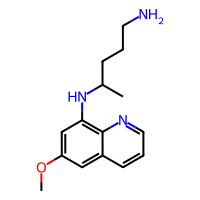
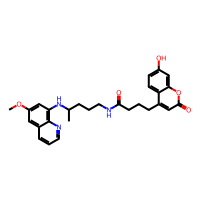
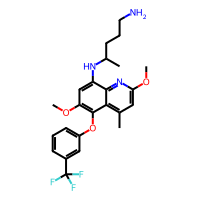
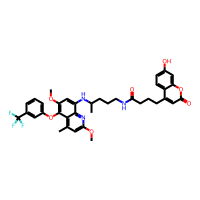

In [23]:
#use function to append descriptors to df

MW, logp, tpsa, H_acceptors, H_donors = mol_properties(df['SMILES'])
df['Molecular Weight'] = MW
df['LogP'] = logp
df['Polar Surface Area'] =  tpsa
df['H_bond_acc'] = H_acceptors
df['H_bond_donors'] = H_donors

df.head()

In [24]:
#finding all descriptors generated by rdkit 

#place molecules into list
mol_list = [PQ, PQCP, TQ, TQCP]

#generate descriptors
descr = [Descriptors.CalcMolDescriptors(mol) for mol in mol_list]

# Generate DataFrame and set the molecule names as the index
df_descr = pd.DataFrame(descr, index=df['Compound']) 

#display molecular structure instead of HTML code
PandasTools.RenderImagesInAllDataFrames(images=True)

df_descr.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
Compound,,,,,,,,,,,,,,,,,,,,,
Primaquine,5.546261,5.546261,0.361909,0.361909,0.837129,259.353,238.185,259.168462,102,0,...,0,0,0,0,0,0,0,0,0,0
PQCP,12.298928,12.298928,0.010632,-0.464809,0.205291,489.572,458.324,489.226371,188,0,...,0,0,0,0,0,0,0,0,1,0
Tafenoquine,13.195201,13.195201,0.038580,-4.482334,0.410730,463.500,435.276,463.208276,178,0,...,0,0,0,0,0,0,0,0,0,0
TQCP,13.398982,13.398982,0.001611,-4.532760,0.078445,693.719,655.415,693.266185,264,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
#code to merge df to df_descr
df_ = df.merge(df_descr, how='left', on='Compound')
df_.isna().any().all()

False

In [26]:
#how many columns only have 0 values for compounds?

col_with_zero = df_.columns[(df_ == 0).all()]
print(col_with_zero)

Index(['NumRadicalElectrons', 'PEOE_VSA13', 'PEOE_VSA5', 'SMR_VSA2',
       'SMR_VSA8', 'SlogP_VSA12', 'SlogP_VSA7', 'SlogP_VSA9', 'EState_VSA11',
       'VSA_EState10', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles',
       'NumAliphaticRings', 'NumSaturatedCarbocycles',
       'NumSaturatedHeterocycles', 'NumSaturatedRings', 'fr_Al_COO',
       'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_NH',
       'fr_COO', 'fr_COO2', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_N_O',
       'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH',
       'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_allylic_oxid', 'fr_amidine',
       'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo',
       'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_furan',
       'fr_guanido', 'fr_hdrzine', 'fr_hdrzone', 'fr_imidazole', 'fr_imide',
       'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss',
       'fr_lactam', 'fr_lactone', 'fr_morpholine', 'fr_nitril

,Compound,SMILES,3D7_IC50 (uM),Molecular_structure,Molecular Weight,LogP,Polar Surface Area,H_bond_acc,H_bond_donors,MaxAbsEStateIndex,...,fr_aryl_methyl,fr_benzene,fr_bicyclic,fr_ether,fr_halogen,fr_methoxy,fr_phenol,fr_phenol_noOrthoHbond,fr_pyridine,fr_unbrch_alkane
0,Primaquine,COc2cc(NC(C)CCCN)c1ncccc1c2,5.77,,259.353,2.78270,60.17,4,2,5.546261,...,0,1,1,1,0,1,0,0,1,0
1,PQCP,COc4cc(NC(C)CCCNC(=O)CCCc1cc(=O)oc2cc(O)ccc12)...,10.50,,489.572,4.77510,113.69,7,3,12.298928,...,1,2,2,1,0,1,1,1,1,1
2,Tafenoquine,COc3cc(C)c2c(Oc1cccc(C(F)(F)F)c1)c(OC)cc(NC(C)...,3.59,,463.500,5.91082,78.63,6,2,13.195201,...,1,2,1,3,3,2,0,0,1,0
3,TQCP,COc5cc(C)c4c(Oc1cccc(C(F)(F)F)c1)c(OC)cc(NC(C)...,2.19,,693.719,7.90322,132.15,9,3,13.398982,...,2,3,2,3,3,2,1,1,1,1

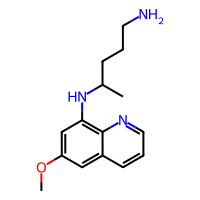
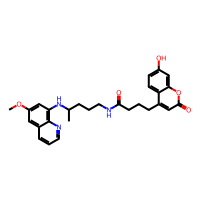
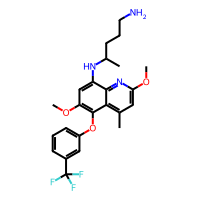
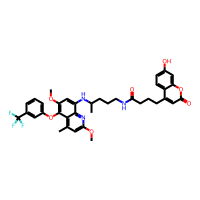

In [27]:
#dropping col_with_zero from df

df_.drop(col_with_zero, axis=1, inplace=True)
df_

In [28]:
#saving df_ for future projects and analysis

# df_.to_csv('Probedata.xlsx', index=False)

## Generating MACCS Keys fingerprints

MACCS finger prints will be generated based on the 'df' dataframe. Fingerprints will be generated based on upon the molecular graphs instead of the SMILES.

In [29]:
#generating Molecular Access System keys

#load MACCS key package
from rdkit.Chem import MACCSkeys
#define variable for MACCS key generation for Primaquine
Mkey_PQ = MACCSkeys.GenMACCSKeys(df.Molecular_structure[0])

#use numpy array to see on and off bits for PQ
print(np.array(Mkey_PQ))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0]


In [30]:
np.array(Mkey_PQ).shape

(167,)

In [31]:
#how many bits are on in PQ?

#index of on bits
print("Index of On bits:", tuple(Mkey_PQ.GetOnBits()))

#number of on bits
print("Number of On bits:", len(Mkey_PQ.GetOnBits()))

Index of On bits: (65, 79, 82, 84, 90, 91, 93, 97, 98, 100, 101, 104, 105, 108, 111, 113, 115, 116, 118, 121, 125, 126, 127, 131, 133, 135, 137, 142, 143, 145, 147, 149, 151, 152, 153, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165)
Number of On bits: 45


In [32]:
#define a function that will take a molecular structure from the dataframe and return the index and number of on bits

def MACCSKey_bitgen(structure):
    Key = MACCSkeys.GenMACCSKeys(structure)
    Index = tuple(Key.GetOnBits())
    Number = len(Key.GetOnBits())
    
    return print("Index of On bits:", Index), print("Number of On bits:", Number)

In [33]:
#MACCSKey generation for PQCP

MACCSKey_bitgen(df.Molecular_structure[1])

Index of On bits: (57, 65, 79, 82, 89, 90, 91, 92, 93, 97, 98, 100, 101, 104, 105, 108, 110, 111, 113, 115, 116, 117, 118, 120, 121, 123, 125, 126, 127, 128, 129, 131, 132, 133, 135, 136, 137, 139, 140, 142, 143, 145, 146, 147, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165)
Number of On bits: 60


(None, None)

In [34]:
#Keys for TQ and TQCP

MACCSKey_bitgen(TQ)

Index of On bits: (42, 65, 72, 79, 82, 84, 90, 91, 92, 93, 97, 98, 100, 101, 104, 105, 106, 107, 108, 110, 111, 112, 113, 115, 116, 117, 118, 121, 125, 126, 127, 131, 133, 134, 135, 137, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165)
Number of On bits: 59


(None, None)

In [35]:
MACCSKey_bitgen(TQCP)

Index of On bits: (42, 57, 65, 72, 79, 82, 89, 90, 91, 92, 93, 97, 98, 100, 101, 104, 105, 106, 107, 108, 110, 111, 112, 113, 115, 116, 117, 118, 120, 121, 123, 125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165)
Number of On bits: 69


(None, None)

## Generating Avalon Fingerprints

In [36]:
from rdkit.Avalon import pyAvalonTools

Av_PQ = pyAvalonTools.GetAvalonFP(PQ, nBits=512)
print(np.array(Av_PQ))

[1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 

In [37]:
#index of on bits
print("Index of On bits:", tuple(Av_PQ.GetOnBits()))

#number of on bits
print("Number of On bits:", len(Av_PQ.GetOnBits()))

Index of On bits: (0, 7, 9, 13, 15, 16, 19, 23, 26, 34, 36, 38, 41, 49, 57, 59, 60, 62, 67, 71, 74, 80, 81, 84, 86, 104, 110, 112, 116, 117, 125, 132, 138, 139, 145, 153, 157, 179, 181, 182, 186, 189, 193, 194, 199, 203, 205, 214, 220, 222, 244, 251, 253, 262, 266, 270, 274, 279, 281, 284, 288, 291, 292, 293, 295, 298, 304, 305, 312, 315, 319, 322, 323, 324, 337, 343, 345, 350, 351, 354, 359, 364, 365, 370, 371, 374, 375, 383, 389, 400, 407, 417, 418, 425, 436, 439, 440, 442, 451, 454, 455, 464, 471, 478, 486, 488, 492, 495, 502)
Number of On bits: 109


### What if we wanted to generate multiple fingerprints for multiple molecules?

In [38]:
def generate_fp(data):
    #create empty lists to store fingerprints
    
    #morgan fingerprints
    Mfp =[]
    
    #MACCs Keys
    MACCs = []
    
    #Avalon fingerprints
    Av = []
    
    for mol in data:
        
        #calculate Morgan fingerprints and append to empty list
        m_fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        Mfp.append(m_fp)
        
        #calculate MACCs Keys and append to list
        
        MACCs_fp = MACCSkeys.GenMACCSKeys(mol)
        MACCs.append(MACCs_fp)
        
        #calculate avalon fingerprint and append to list
        
        Avalon = pyAvalonTools.GetAvalonFP(mol, nBits=512)
        Av.append(Avalon)
        
    return np.array(Mfp), np.array(MACCs), np.array(Av)
    
    

In [39]:
Morgan, MACC, Av = generate_fp(df['Molecular_structure'])

In [40]:
Morgan.shape

(4, 2048)

In [41]:
MACC.shape

(4, 167)

In [42]:
Av.shape

(4, 512)